<a href="https://colab.research.google.com/github/hsargoli/Mythesis-detect-type-of-DullDrillingBit/blob/master/More_approach_MrCnn_(thesis)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **`install`**






In [ ]:
!pip uninstall -y tensorflow
!pip uninstall -y mrcnn


Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0


In [ ]:
#!pip install mrcnn==0.1
!pip install tensorflow-gpu==1.14.0  # for GPU
###!pip install tensorflow==1.4.1
#!pip install tensorflow==1.3
#!pip install keras==2.0.8
!pip install keras==2.1.3
#!pip install keras==2.2
#!pip install keras==2.1.5
#!pip install keras==2.1.3


     |████████████████████████████████| 377.1 MB 9.2 kB/s 
     |████████████████████████████████| 3.1 MB 42.2 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 488 kB 39.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
     |████████████████████████████████| 319 kB 4.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [ ]:
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import seaborn as sns
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from keras.utils import np_utils
import datetime
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#===========================
import time

import os 
import sys
os.chdir('/content/drive/MyDrive')

import sgan
import matplotlib.pyplot as plt
import numpy as np
from sgdata import dataset
sgdat=dataset('/content//drive//MyDrive//second')
xydata=sgdat.classify_dataset(250)
x_back,y_back=xydata['x_back'],xydata['y_back']
x_mask,y_mask=xydata['x_mask'],xydata['y_mask']
x_raw,y_raw=xydata['x_raw'],xydata['y_raw']
X=np.concatenate((x_back,x_mask,x_raw))
Y=np.concatenate((y_back,y_mask,y_raw))
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X, Y, test_size=0.33, random_state=1)
print(X_TRAIN.shape,X_TEST.shape,Y_TRAIN.shape,Y_TEST.shape)
from tensorflow.keras import layers
import tensorflow.keras.models as models
myimput=layers.Input(shape=(250,250,3))
x=layers.Conv2D(32,(10,10),activation='relu',padding='SAME')(myimput)
x=layers.Conv2D(64,(8,8),activation='relu',padding='SAME')(x)
x=layers.Conv2D(128,(5,5),activation='relu',padding='SAME')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='SAME')(x)

x=layers.Conv2D(8,(3,3),activation='relu',padding='SAME')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(2,(3,3),activation='relu',padding='SAME')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(32,(2,2),activation='relu',padding='SAME')(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='SAME')(x)

x=layers.Flatten()(x)
x= layers.Dense(500, activation='relu')(x)

x= layers.Dense(300, activation='relu')(x)
x=layers.BatchNormalization()(x)

x= layers.Dense(85, activation='relu')(x)
x= layers.Dense(20, activation='relu')(x)

y = layers.Dense(2, activation='tanh')(x)
model0 = models.Model(myimput, y)
model0.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

(40, 250, 250, 3) (20, 250, 250, 3) (40, 2) (20, 2)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 32)      9632      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 64)      131136    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 128)     204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 32)      36896     
_________________________________________________________________
conv2d_4 (Conv2D)      

In [ ]:
import time
ST=time.time()
model0.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
histo=model0.fit(X,Y,validation_split=.33,epochs=100)


el=time.time()-ST
print('elapsed time',el)

In [ ]:
#---------
#  take history of loss and acc from fit and plot them
history1=histo.history
loss1=history1['loss']
accuracy1=history1['acc']
val_loss0=history1['val_loss']
val_accuracy0=history1['val_acc']
loss1[-1]
#-----------------
fig=plt.figure()
fig.patch.set_facecolor('c')
ax1=fig.add_axes([0,0,1.5,.5])
ax1.plot(loss1,c='r'),plt.plot(val_loss0,c='b',ls='--',lw=2),plt.legend(['train','validation'],loc='best'),plt.title('loss'),plt.xlabel('epochs'),plt.ylabel('loss')#,plt.ylim((0,1))
ax2=fig.add_axes([0,.7,1.5,.5])
ax2.plot(accuracy1,c='m',ls='-.',lw=2),plt.plot(val_accuracy0,c='g',lw=2),plt.legend(['train','validation'],loc='best'),plt.title('acc'),plt.xlabel('epochs'),plt.ylabel('accuracy')
plt.show()

In [ ]:
print(model0.evaluate(X_TEST,Y_TEST),'\n\n',model0.predict(X_TEST),Y_TEST)
#plt.imshow(X_TEST[3])
plt.imshow(X[5])

In [ ]:
layers.**?

# ***third***✈✈✈✈✈✈✈✈

In [ ]:
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import seaborn as sns
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from keras.utils import np_utils
import datetime
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#===========================
import time

import os 
import sys
os.chdir('/content/drive/MyDrive')

import sgan
import matplotlib.pyplot as plt
import numpy as np
from sgdata import dataset
sgdat=dataset('/content//drive//MyDrive//third')
xydata=sgdat.classify_dataset(250)
x_back,y_back=xydata['x_back'],xydata['y_back']
x_mask,y_mask=xydata['x_mask'],xydata['y_mask']
x_raw,y_raw=xydata['x_raw'],xydata['y_raw']
#X=np.concatenate((x_back,x_mask,x_raw))
#Y=np.concatenate((y_back,y_mask,y_raw))
#print(X,Y)
#X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X, Y, test_size=0.33, random_state=1)
#print(X_TRAIN.shape,X_TEST.shape,Y_TRAIN.shape,Y_TEST.shape)
from tensorflow.keras import layers
import tensorflow.keras.models as models
myimput=layers.Input(shape=(100,100,1))

x=layers.Conv2D(512,(3,3),activation='relu',padding='SAME')(myimput)
x=layers.Conv2D(128,(3,3),activation='relu',padding='SAME')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='SAME')(x)
x=layers.Conv2D(16,(3,3),activation='relu',padding='SAME')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.MaxPooling2D(pool_size=2)(x)

x=layers.Conv2D(64,3,activation='relu',padding='SAME')(x)
x=layers.Conv2D(16,3,activation='relu',padding='SAME')(x)
x=layers.Conv2D(8,3,activation='relu',padding='SAME')(x)
x=layers.Conv2D(2,3,activation='relu',padding='SAME')(x)


x=layers.Flatten()(x)

x= layers.Dense(200, activation='relu')(x)
x=layers.BatchNormalization()(x)
x= layers.Dense(100, activation='relu')(x)

x= layers.Dense(70, activation='relu')(x)
x= layers.Dense(25, activation='relu')(x)

x= layers.Dense(10, activation='relu')(x)
x= layers.Dense(6, activation='relu')(x)

y = layers.Dense(4, activation='tanh')(x)
model0 = models.Model(myimput, y)
model0.summary()
XT=sgdat.rawimgs
YT=sgdat.get_allbound()
XT=np.array(XT)
YT=np.array(YT)
print(YT.shape)
YT=YT.reshape(441,4)
XT=np.resize(XT,(441,100,100,1))
print(XT.shape)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 100, 100, 512)     5120      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 100, 100, 128)     589952    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 100, 100, 32)      36896     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 100, 100, 16)      4624      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 25, 25, 16)        0   

In [ ]:
import time
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2),]
ST=time.time()
model0.compile(optimizer=keras.optimizers.Adam(learning_rate=.00001),loss=keras.losses.MSLE,metrics=['accuracy'])
histo=model0.fit(XT,YT,epochs=100,validation_split=.15,callbacks=my_callbacks)


el=time.time()-ST
print('elapsed time',el)

Train on 374 samples, validate on 67 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
374/374 [==============================] - 16s 42ms/sample - loss: 13.8792 - acc: 0.4840 - val_loss: 14.9035 - val_acc: 0.4478
Epoch 2/100
374/374 [==============================] - 4s 11ms/sample - loss: 13.7420 - acc: 0.5000 - val_loss: 14.8521 - val_acc: 0.4627
Epoch 3/100
374/374 [==============================] - 4s 11ms/sample - loss: 13.6641 - acc: 0.5241 - val_loss: 14.8105 - val_acc: 0.4776
Epoch 4/100
374/374 [==============================] - 4s 11ms/sample - loss: 13.5748 - acc: 0.4840 - val_loss: 14.7678 - val_acc: 0.4925
Epoch 5/100
374/374 [==============================] - 4s 11ms/sample - loss: 13.5101 - acc: 0.5134 - val_loss: 14.7214 - val_acc: 0.4925
Epoch 6/100
374/374 [==============================] - 4s 11ms/sample - loss: 13.4352 - acc: 0.5160 - val_loss: 14.6834 - val_acc: 0.5075
Epoch 7/100
374/374 [===========

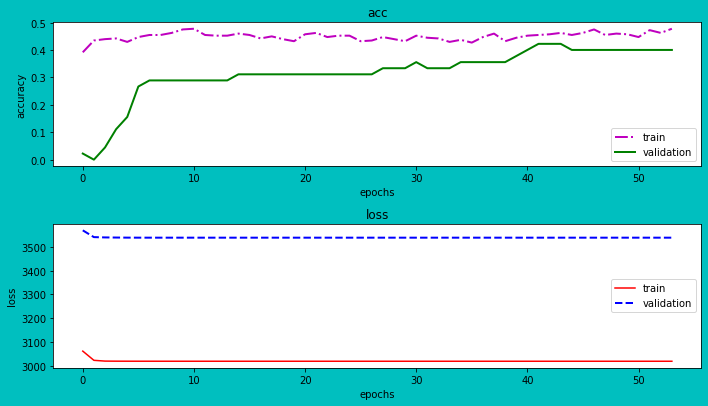

In [ ]:
#---------
#  take history of loss and acc from fit and plot them
history1=histo.history
loss1=history1['loss']
accuracy1=history1['acc']
val_loss0=history1['val_loss']
val_accuracy0=history1['val_acc']
loss1[-1]
#-----------------
fig=plt.figure()
fig.patch.set_facecolor('c')
ax1=fig.add_axes([0,0,1.5,.5])
ax1.plot(loss1,c='r'),plt.plot(val_loss0,c='b',ls='--',lw=2),plt.legend(['train','validation'],loc='best'),plt.title('loss'),plt.xlabel('epochs'),plt.ylabel('loss')#,plt.ylim((0,1))
ax2=fig.add_axes([0,.7,1.5,.5])
ax2.plot(accuracy1,c='m',ls='-.',lw=2),plt.plot(val_accuracy0,c='g',lw=2),plt.legend(['train','validation'],loc='best'),plt.title('acc'),plt.xlabel('epochs'),plt.ylabel('accuracy')
plt.show()

In [ ]:
!rm /usr/local/lib/python3.6/dist-packages/mrcnn/model.py

# `imports`

# `functions --> dataset `

In [ ]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import numpy as np
import os
os.chdir('/content/drive/My Drive/TH/DS2/')
print('current directory is :' , os.getcwd())
#=========================================================
# class that defines and loads the dataset
#=========================================================
 
class cutterDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class("cutter", 1, "cutter")
        # define data locations
        images_dir = dataset_dir + '/kernel/'
        annotations_dir = dataset_dir + '/annot/'
        # find all images
        for filename in listdir(images_dir):
            # extract image id
            image_id = filename[:-4]
            # skip bad images
            if image_id in ['00090']:
                continue
            # skip all images after 150 if we are building the train set
            if is_train and int(image_id) >= 25:
                continue
            # skip all images before 150 if we are building the test/val set
            if not is_train and int(image_id) < 25:
                continue
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            # add to dataset
            self.add_image('cutter', image_id=image_id, path=img_path, annotation=ann_path)
        
 
    # extract bounding boxes from an annotation file
    def extract_boxes(self, image_id):
        # load and parse the file
        tree = ElementTree.parse(image_id)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = list()
        for box in root.findall('.//object'):
            name = box.find('name').text
            xmin = int(box.find('./bndbox/xmin').text)
            ymin = int(box.find('./bndbox/ymin').text)
            xmax = int(box.find('./bndbox/xmax').text)
            ymax = int(box.find('./bndbox/ymax').text)
            coors = [xmin, ymin, xmax, ymax,name]
            boxes.append(coors)
        # extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height
 
 
 



    def load_mask(self, image_id):
          # get details of image
          info = self.image_info[image_id]
          # define box file location
          class_ids = list()
          path = info['annotation']
          # load XML
          boxes, w, h = self.extract_boxes(path)
          # create one array for all masks, each on a different channel
          masks = zeros([h, w, len(boxes)], dtype='uint8')
          # create masks
          for i in range(len(boxes)):
                box = boxes[i]
                row_s, row_e = box[1], box[3]
                col_s, col_e = box[0], box[2]
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('cutter')) 
          return masks, asarray(class_ids, dtype='int32')

    # load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

current directory is : /content/drive/My Drive/TH/DS2


Using TensorFlow backend.


#  `config`

In [ ]:
 
#=========================================================
#cutterConfig
#=========================================================
# define a configuration for the model
class cutterConfig(Config):
    # define the name of the configuration
    NAME = "cutter_cfg"
    # number of classes (background + kangaroo)
    NUM_CLASSES = 1 + 1
    # number of training steps per epoch
    STEPS_PER_EPOCH = 1000
    RPN_ANCHOR_SCALES =[32,64,128,256,512]
    MEAN_PIXEL=[150,150,150]
    USE_MINI_MASK=True
    IMAGES_PER_GPU=1
# prepare train set
train_set = cutterDataset()
train_set.load_dataset('./', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
# prepare test/val set
test_set = cutterDataset()
test_set.load_dataset('./', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
# prepare config
config = cutterConfig()
config.display()

model = MaskRCNN(mode='training', model_dir='./', config=config)

path_weights='/content/drive/My Drive/TH/DS1/'+'cutter_cfg20201022T1442/mask_rcnn_cutter_cfg_0002.h5'
path_weights_coco='/content/drive/My Drive/mask_rcnn_coco.h5'


model.load_weights(path_weights, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])


Train: 24
Test: 3

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28

In [ ]:

# define the model

# load weights (mscoco) and exclude the output layers
# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE*.1, epochs=5, layers='all') #heads


Starting at epoch 2. LR=0.0001

Checkpoint Path: ./cutter_cfg20201022T1442/mask_rcnn_cutter_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b          (Ba

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "




Epoch 3/5
1000/1000 [==============================] - 1082s 1s/step - loss: 0.9079 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.1129 - mrcnn_class_loss: 0.1194 - mrcnn_bbox_loss: 0.1902 - mrcnn_mask_loss: 0.4674 - val_loss: 2.2975 - val_rpn_class_loss: 0.0456 - val_rpn_bbox_loss: 0.7060 - val_mrcnn_class_loss: 0.2130 - val_mrcnn_bbox_loss: 0.4228 - val_mrcnn_mask_loss: 0.9101
Epoch 4/5
1000/1000 [==============================] - 946s 946ms/step - loss: 0.2013 - rpn_class_loss: 0.0016 - rpn_bbox_loss: 0.0117 - mrcnn_class_loss: 0.0155 - mrcnn_bbox_loss: 0.0237 - mrcnn_mask_loss: 0.1488 - val_loss: 2.7500 - val_rpn_class_loss: 0.0496 - val_rpn_bbox_loss: 0.6966 - val_mrcnn_class_loss: 0.2511 - val_mrcnn_bbox_loss: 0.4119 - val_mrcnn_mask_loss: 1.3407
Epoch 5/5
1000/1000 [==============================] - 948s 948ms/step - loss: 0.1250 - rpn_class_loss: 0.0011 - rpn_bbox_loss: 0.0053 - mrcnn_class_loss: 0.0102 - mrcnn_bbox_loss: 0.0133 - mrcnn_mask_loss: 0.0950 - val_loss: 3.2493 - val

# detect object


In [ ]:
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "cutter_cfg"
    # number of classes (background + kangaroo)
    NUM_CLASSES = 1 + 1
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

train_set = cutterDataset()
train_set.load_dataset('./', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
# load the test dataset
test_set = cutterDataset()
test_set.load_dataset('./', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
path_weights='/content/drive/My Drive/TH/DS1/'+'cutter_cfg20201022T2236/mask_rcnn_cutter_cfg_0002.h5'
model.load_weights(path_weights, by_name=True)
# evaluate model on training dataset
#   train_mAP = evaluate_model(train_set, model, cfg)
#print("Train mAP: %.3f" % train_mAP)
# evaluate model on test dataset
#test_mAP = evaluate_model(test_set, model, cfg)
#print("Test mAP: %.3f" % test_mAP)

Train: 346
Test: 119
Re-starting from epoch 2


>>> : source cutter >>>>    name 27     > image ID  (1)  >   image_reference .//images1/27.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


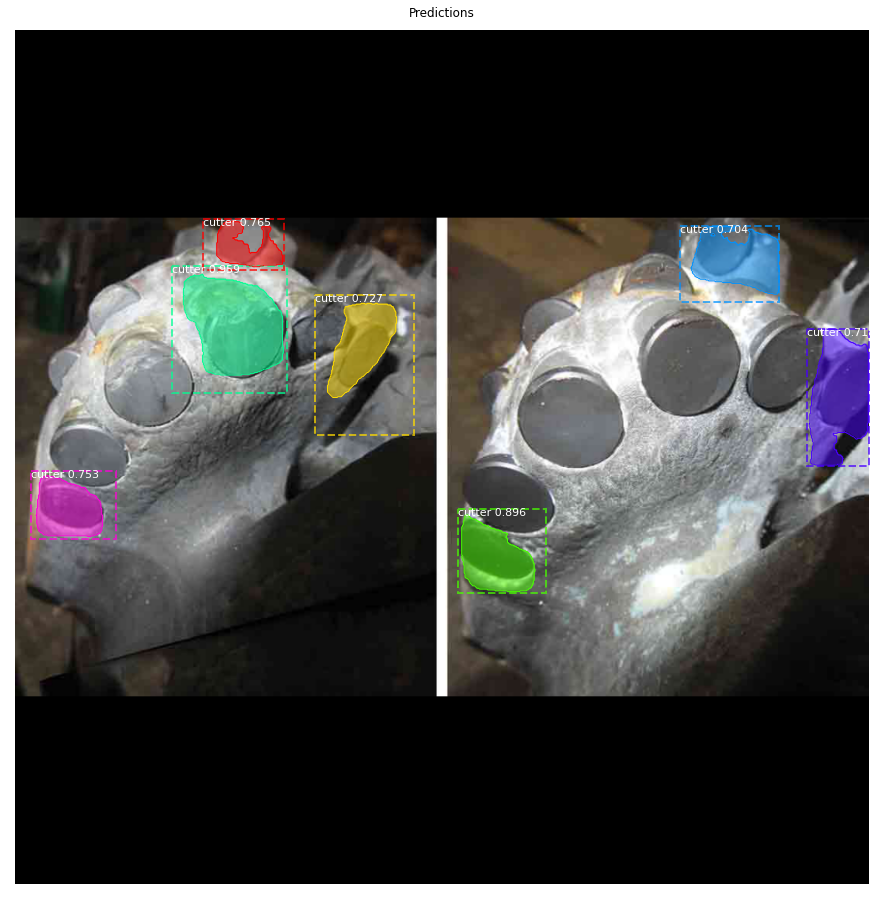

In [ ]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn import visualize
import time
# ===================================
# find  instance 
# ---------4  10---14---25-----------1---------
idd=1

image, image_meta, gt_class_id, gt_bbox, gt_mask =load_image_gt(train_set, cfg, idd, use_mini_mask=False)
info = train_set.image_info[idd]
print(">>> : source {} >>>>    name {}     > image ID  ({})  >   image_reference {}".format(info["source"], info["id"], idd,train_set.image_reference(idd)))
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            train_set.class_names, r['scores'], 
                            title="Predictions")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f30c4302278>,
 <matplotlib.image.AxesImage at 0x7f30c42802e8>)

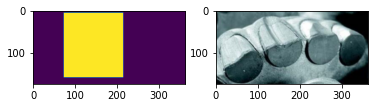

In [ ]:
# ===========================
# show mask of dataset with org image
# ---------------------------
import matplotlib.pyplot as plt
sh=plt.imshow
idd=26
canch=0
plt.subplot(1,2,1),sh(train_set.load_mask(idd)[0][:,:,canch])
plt.subplot(1,2,2),sh(train_set.load_image(idd))